In [1]:
import os
os.getcwd()

'C:\\code\\jupyter_notebooks\\AI practice\\AI Projects'

In [2]:
os.chdir("C:/code/jupyter_notebooks/datasets/sentiment_detection")

In [3]:
os.getcwd()

'C:\\code\\jupyter_notebooks\\datasets\\sentiment_detection'

In [4]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = pd.read_csv('Training_Reddit_Data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df1 = data[data.isna().any(axis=1)]

In [9]:
df1

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


**Removing null values of comments, as they won't be useful in training**

In [10]:
data =data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


**Now, data has no  null values**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [13]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


**Creating input for the learning model**

**Splitting the data**

In [14]:
# Splitting dataset into training and testing set
X = data['clean_comment']
y = data['category']

In [15]:
X.head()

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [16]:
y.head()

0    1
1    1
2   -1
3    0
4    1
Name: category, dtype: int64

In [47]:
#replacing negative as '2'
data.category.replace([-1], [2], inplace=True)

In [48]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,2
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [49]:
train_size = 22290
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [50]:
X_train.shape

(22290,)

In [51]:
X_test.shape

(14859,)

**Training Data exploration**

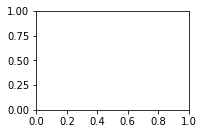

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1= fig.add_subplot(221)

In [53]:
y_train.value_counts().plot(kind ='bar', ax=ax1)

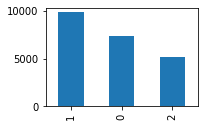

In [54]:
fig

In [56]:
y_train.value_counts()

1    9821
0    7341
2    5128
Name: category, dtype: int64

**Defining model**

In [57]:
#hyperparameter
vocab_size = 60000
oov_tok = "<OOV>"
embedding_dim = 16
max_length = 300
trunc_type='post'
num_epochs = 20

In [58]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#TRAINING SET
#Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
#Padding of the sequences
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, truncating=trunc_type)

#TEST SET
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length)

In [59]:
X_train_padded[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,  1970,    22,    73,    80,
          72, 10551,    12,  2564,   463,  1150,     4,  7446,     3,
        2262,     8,   375,     2,    33,    85,  2262,  1932,  2786,
         112,   991,

**Defining model**

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
    
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 16)           960000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 28806     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 21        
Total params: 988,827
Trainable params: 988,827
Non-trainable params: 0
_________________________________________________________________


In [61]:
X_train = X_train_padded
X_test = X_test_padded
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Train on 22290 samples, validate on 14859 samples
Epoch 1/20
22290/22290 [==============================] - 24s 1ms/sample - loss: 0.8523 - accuracy: 0.6080 - val_loss: 0.6851 - val_accuracy: 0.7128
Epoch 2/20
22290/22290 [==============================] - 23s 1ms/sample - loss: 0.5579 - accuracy: 0.7451 - val_loss: 0.5858 - val_accuracy: 0.7466
Epoch 3/20
22290/22290 [==============================] - 24s 1ms/sample - loss: 0.3650 - accuracy: 0.8603 - val_loss: 0.5126 - val_accuracy: 0.8084
Epoch 4/20
22290/22290 [==============================] - 24s 1ms/sample - loss: 0.1782 - accuracy: 0.9472 - val_loss: 0.4995 - val_accuracy: 0.8219
Epoch 5/20
22290/22290 [==============================] - 24s 1ms/sample - loss: 0.0875 - accuracy: 0.9786 - val_loss: 0.5195 - val_accuracy: 0.8238
Epoch 6/20
22290/22290 [==============================] - 24s 1ms/sample - loss: 0.0460 - accuracy: 0.9908 - val_loss: 0.5465 - val_accuracy: 0.8346
Epoch 7/20
22290/22290 [==============================] 

In [62]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(60000, 16)


In [63]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

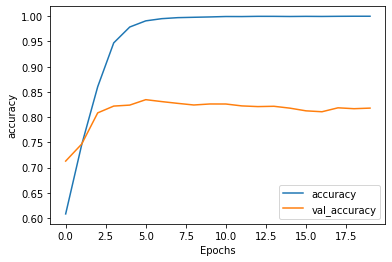

In [64]:
plot_graphs(history, 'accuracy')

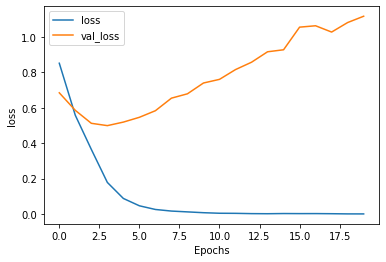

In [65]:
plot_graphs(history, 'loss')

In [76]:
y_pred = model.predict(X_test)
y_classes = model.predict_classes(X_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_sentiments)
print('Accuracy: %f' % accuracy)


Accuracy: 0.817821
